In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.shape

(7613, 5)

In [5]:
df['text'].iloc[75]

'RT @SleepJunkies: Sleeping pills double your risk of a car accident http://t.co/7s9Nm1fiCT'

In [6]:
df.iloc[75]

id                                                        109
keyword                                              accident
location                                                  NaN
text        RT @SleepJunkies: Sleeping pills double your r...
target                                                      0
Name: 75, dtype: object

In [7]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
df['keyword'].nunique()

221

In [9]:
df['location'].nunique()

3341

### data cleaning

In [10]:
# cleaning data from url, hastag, symbol
def clean_text(df,text):
    df['text_clean'] = df[text].apply(lambda x: re.sub(r"http\S+", '',x))
    df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"http", '',x))
    df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"@\S+", '',x))
    df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", ' ',x))
    df['text_clean'] = df['text_clean'].apply(lambda x: re.sub(r"@", "at",x))
    df['text_clean'] = df['text_clean'].str.replace('#','')
    df['text_clean'] = df['text_clean'].str.lower()                                         

In [11]:
clean_text(df,'text')

In [12]:
df

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as ...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant cranes holding a bridge collapse int...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,the out of control wild fires in california ...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m1 94 01 04 utc ?5km s of volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating after an e bike collided ...


## data preprocessing
what we will do :
* tokenization > split sentence into token/words
* stop words > removing stop words
* stemming and lemmatization with part of speech > convert words into its base form

### tokenization

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
df['text_clean'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [15]:
df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[all, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[just, got, sent, this, photo, from, ruby, ala..."


### replace abbreviations
replace some abbreviation 

In [16]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [17]:
# create function to mapping
def replace_abr(text,abb):
    return [abb.get(w, w) for w in text]

In [18]:
df['text_clean'] = df['text_clean'].apply(lambda x:replace_abr(x, abbreviations))

### stop words
removing the stopwords, since the stop words tend to not carry much maeningful information for certain NLP tasks

In [19]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
df['text_clean'] = df['text_clean'].apply(lambda x: [i for i in x if i not in stopwords.words('english')])

In [21]:
df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, 'shelter, place, ', notifie..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


### stemming and lemmatization
* stemming : convert the words to its stem/root form by removing sufix
* lemmatization : convert the words into its base form/lemma/directionary form

In [22]:
nltk.download('wordnet') # lexical database
nltk.download('omw-1.4') # Open Multingual Wordnet > provide access to wordnet in various language
nltk.download('averaged_perceptron_tagger') # part of speech tagging

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\iqbal\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet

In [24]:
df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[residents, asked, 'shelter, place, ', notifie..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, wildfires, evacuatio..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [25]:
lemmatizer = WordNetLemmatizer()

In [26]:
# create a function to extract part of speech (POS)
def get_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper() 
    tag_dict = {'V':wordnet.VERB,
               'N':wordnet.NOUN,
               'J':wordnet.ADJ,
               'R':wordnet.ADV}
    return tag_dict.get(tag,wordnet.NOUN)

In [27]:
# lemmatization
df['text_clean'] = df['text_clean'].apply(lambda x:[lemmatizer.lemmatize(i, get_pos(i)) for i in x])

In [28]:
df

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[resident, ask, 'shelter, place, ', notify, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, wildfire, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[get, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[two, giant, crane, hold, bridge, collapse, ne..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[control, wild, fire, california, even, northe..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[m1, 94, 01, 04, coordinated universal time, ?..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[police, investigate, e, bike, collide, car, l..."


In [29]:
df[df['target'] == 0]

,id,keyword,location,text,target,text_clean
15,23,NaN,NaN,What's up man?,0,"['s, man, ?]"
16,24,NaN,NaN,I love fruits,0,"[love, fruit]"
17,25,NaN,NaN,Summer is lovely,0,"[summer, lovely]"
18,26,NaN,NaN,My car is so fast,0,"[car, fast]"
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,"[goooooooaaaaaal, !, !, !, !, !, !]"
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,"[great, atmosphere, british, lion, gig, tonigh..."
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,"[cramer, iger, 's, 3, word, wreck, disney, 's,..."
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,"[box, ready, explode, !, explode, kitten, fina..."
7587,10841,NaN,NaN,Sirens everywhere!,0,"[siren, everywhere, !]"


### clean symboll that not separated by space

In [30]:
df['text_clean'] = [re.sub(r'[^a-zA-Z0-9\s]', '', ' '.join(x)).split() for x in df['text_clean']]

In [31]:
df[df['target'] == 0]

,id,keyword,location,text,target,text_clean
15,23,NaN,NaN,What's up man?,0,"[s, man]"
16,24,NaN,NaN,I love fruits,0,"[love, fruit]"
17,25,NaN,NaN,Summer is lovely,0,"[summer, lovely]"
18,26,NaN,NaN,My car is so fast,0,"[car, fast]"
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0,[goooooooaaaaaal]
...,...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0,"[great, atmosphere, british, lion, gig, tonigh..."
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0,"[cramer, iger, s, 3, word, wreck, disney, s, s..."
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0,"[box, ready, explode, explode, kitten, finally..."
7587,10841,NaN,NaN,Sirens everywhere!,0,"[siren, everywhere]"


In [32]:
df.iloc[5]['text']

'#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'

## EDA

In [33]:
# pip install wordcloud

In [34]:
from PIL import Image
from wordcloud import WordCloud

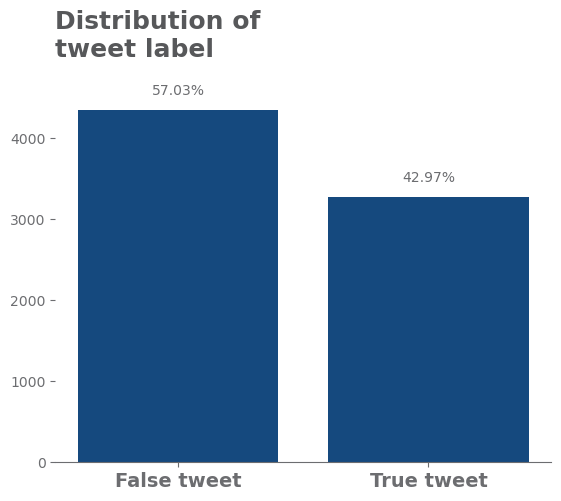

In [35]:
temp = df['target'].value_counts()
plt.bar(temp.index,temp, color='#15497e')
plt.title('Distribution of\ntweet label\n',color='#57585a',fontweight='bold', loc='left', fontsize=18)
plt.ylabel('')
plt.xticks([0,1],['False tweet', 'True tweet'],fontweight='bold',fontsize=14)
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('none')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

for i, v in enumerate(temp):
    pcg = round((v / len(df)) * 100, 2)
    plt.text(i, v + 150, f'{pcg}%', color='#6c6d70', ha='center', va='bottom')

Based on that figure, we can see that the target almost have balance label

In [36]:
df['length'] = df['text'].str.len()

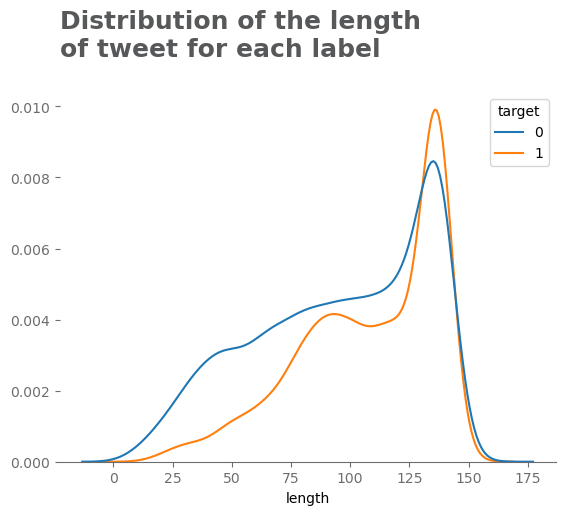

In [37]:
sns.kdeplot(data=df, x=df['length'], hue=df['target'])
plt.title('Distribution of the length\nof tweet for each label \n',color='#57585a',fontweight='bold', loc='left', fontsize=18)
plt.ylabel('')
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('none')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

On the dataset recorded time, twitter only allow user to tweet up to 160 characters. Real disaster tweet tend to have more character on it compared with false disaster tweet

In [38]:
wc_data_all = df['text_clean'].tolist()
wc_data_1 = df[df['target'] == 1]['text_clean'].tolist()
wc_data_0 = df[df['target'] == 0]['text_clean'].tolist()

In [39]:
wc_data_all = ' '.join([word for sublist in wc_data_all for word in sublist])
wc_data_1 = ' '.join([word for sublist in wc_data_1 for word in sublist])
wc_data_0 = ' '.join([word for sublist in wc_data_0 for word in sublist])

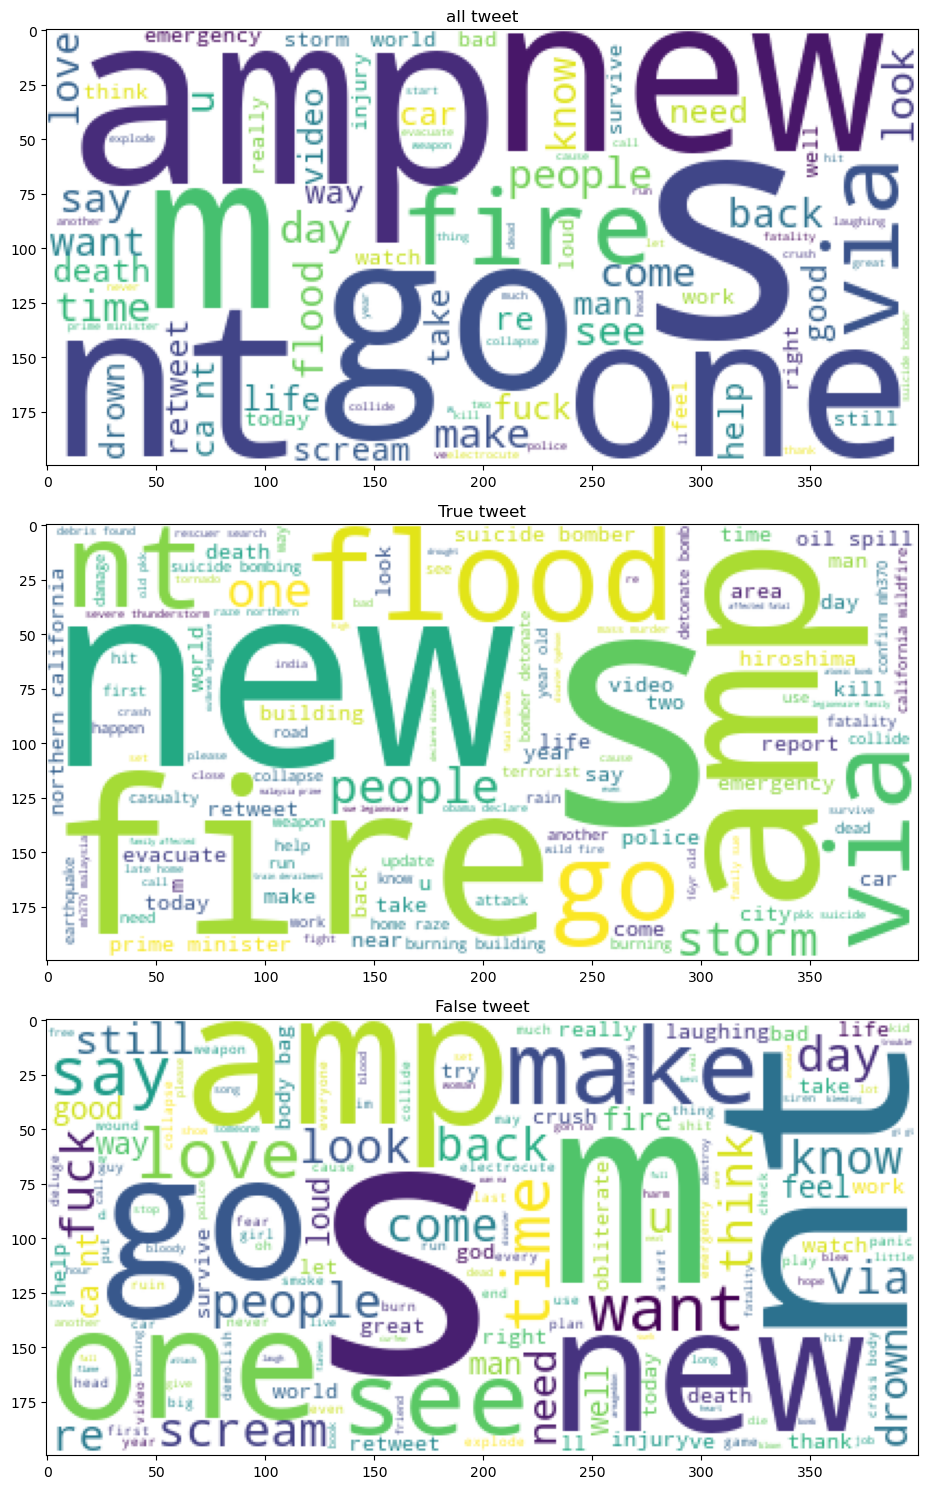

In [40]:
wc_list = [wc_data_all,wc_data_1,wc_data_0]
title = ['all tweet', 'True tweet', 'False tweet']
plt.figure(figsize=(20, 15))  
for i,j in enumerate(wc_list):
    plt.subplot(3,1,i+1)    
    wc = WordCloud(background_color='white').generate(j)
    plt.imshow(wc)
    plt.title(title[i])

plt.tight_layout()
plt.show()

from all text data, we cannot see the tendency of tweet containt disaster related data except small number of fire and flood.

for disaster only data, there are lots of words that correlated with disaster like fire, flood, storm.

wherease in non disaster tweet, there is no disaster realated tweet ecpet only for small number of fire.

## machine learning

### vectorizing/embeddings

### bags of words

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [42]:
# split the dataset into train and test
X = [' '.join(doc) for doc in df['text_clean']]
y = df['target'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=123)

In [43]:
X[:2]

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada']

In [44]:
count_vectorizer = CountVectorizer()

In [45]:
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

In [46]:
X_train_counts

<6090x10964 sparse matrix of type '<class 'numpy.int64'>'
	with 53509 stored elements in Compressed Sparse Row format>

In [47]:
X_test_counts

<1523x10964 sparse matrix of type '<class 'numpy.int64'>'
	with 11871 stored elements in Compressed Sparse Row format>

In [48]:
df.shape

(7613, 7)

### ML model

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

#### model 1 >> Random forest - bags of word

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model1_1 = RandomForestClassifier(random_state=2023)

In [52]:
model1_1.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=2023)

In [53]:
y_pred1_1 = model1_1.predict(X_test_counts)

In [54]:
acs1_1 = accuracy_score(y_test,y_pred1_1)

In [55]:
acs1_1

0.7813525935653316

In [56]:
cm1_1 = confusion_matrix(y_test,y_pred1_1)

In [57]:
labels = ['disaster', 'non-disaster']

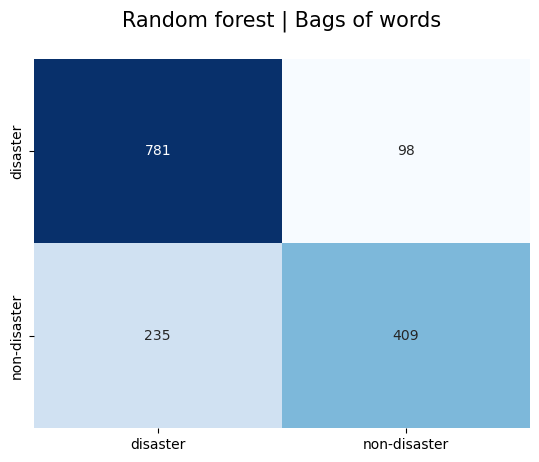

In [58]:
sns.heatmap(cm1_1, annot=True, fmt='d', cmap='Blues',xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Random forest | Bags of words\n', fontsize=15);

#### model 2 >> SVM - bags of word

In [59]:
# from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [60]:
model2_1 = SVC(random_state=2023)

In [61]:
model2_1.fit(X_train_counts,y_train)

SVC(random_state=2023)

In [62]:
y_pred2_1 = model2_1.predict(X_test_counts)

In [63]:
acs2_1 = accuracy_score(y_test,y_pred2_1)

In [64]:
acs2_1

0.8017071569271176

In [65]:
cm2_1 = confusion_matrix(y_test,y_pred2_1)

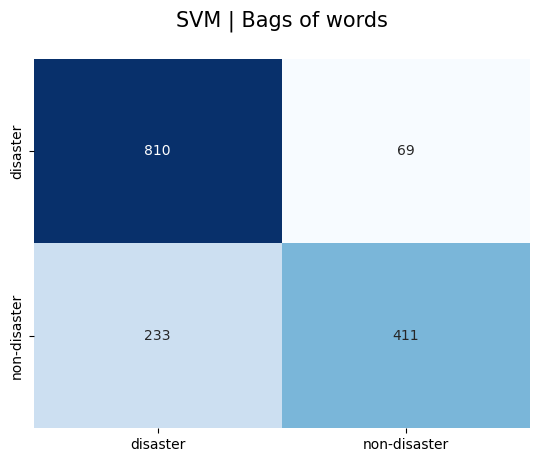

In [66]:
sns.heatmap(cm2_1, cmap='Blues', annot=True, fmt='d',xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('SVM | Bags of words\n', fontsize=15);

#### model 3 >>decission tree - bags of word

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
model3_1 = DecisionTreeClassifier(random_state=2023)

In [69]:
model3_1.fit(X_train_counts,y_train)

DecisionTreeClassifier(random_state=2023)

In [70]:
pred3_1 = model3_1.predict(X_test_counts)

In [71]:
acs3_1 = accuracy_score(y_test,pred3_1)

In [72]:
acs3_1

0.7550886408404465

In [73]:
cm3_1 = confusion_matrix(y_test,pred3_1)

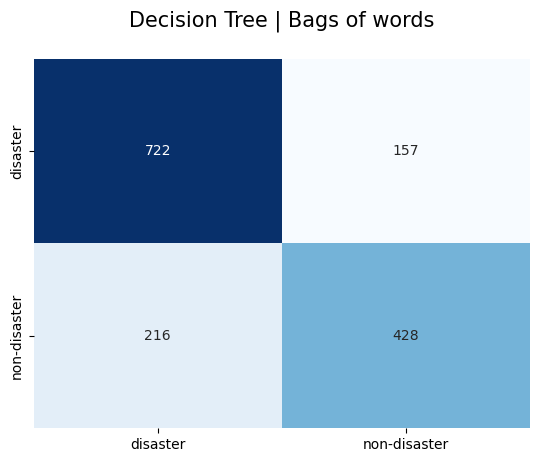

In [74]:
sns.heatmap(cm3_1, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Decision Tree | Bags of words\n', fontsize=15);

### TF-idf

In [75]:
tfidf = TfidfVectorizer()

In [76]:
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [77]:
X_train_tfidf

<6090x10964 sparse matrix of type '<class 'numpy.float64'>'
	with 53509 stored elements in Compressed Sparse Row format>

In [78]:
X_train_tfidf

<6090x10964 sparse matrix of type '<class 'numpy.float64'>'
	with 53509 stored elements in Compressed Sparse Row format>

In [79]:
len(X_test)

1523

#### model 1 >> random forest - tfidf

In [80]:
model1_2 = RandomForestClassifier(random_state=2023)

In [81]:
model1_2.fit(X_train_tfidf,y_train)

RandomForestClassifier(random_state=2023)

In [82]:
y_pred1_2 = model1_2.predict(X_test_tfidf)

In [83]:
acs1_2 = accuracy_score(y_test,y_pred1_2)

In [84]:
acs1_2

0.7747866053841103

In [85]:
cm1_2 = confusion_matrix(y_test,y_pred1_2)

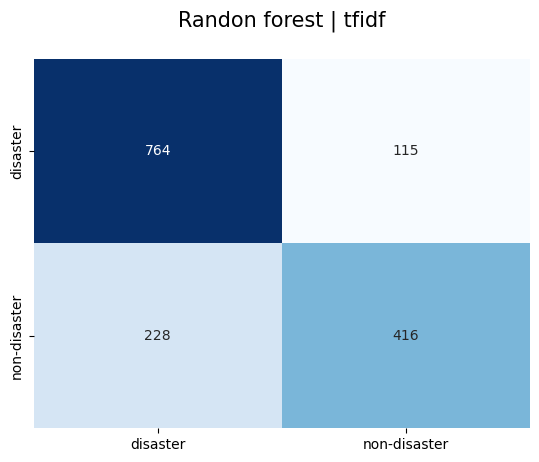

In [86]:
sns.heatmap(cm1_2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Randon forest | tfidf\n', fontsize=15);

#### model 2 >> XGBoost - tfidf

In [87]:
model2_2 = SVC(random_state=2023)

In [88]:
model2_2.fit(X_train_tfidf,y_train)

SVC(random_state=2023)

In [89]:
y_pred2_2 = model2_2.predict(X_test_tfidf)

In [90]:
acs2_2 = accuracy_score(y_test,y_pred2_2)

In [91]:
acs2_2

0.7971109652002626

In [92]:
cm2_2 = confusion_matrix(y_test,y_pred2_2)

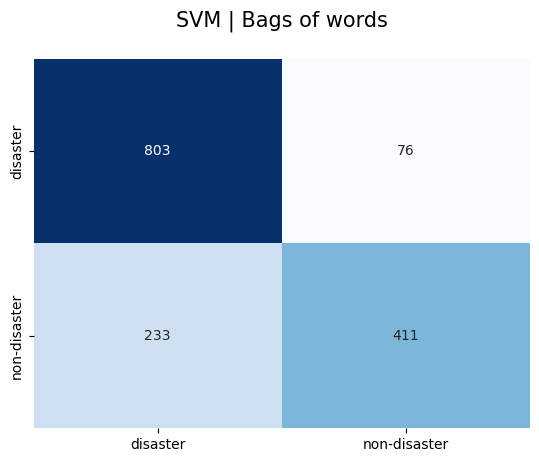

In [93]:
sns.heatmap(cm2_2, cmap='Blues', annot=True, fmt='d',xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('SVM | Bags of words\n', fontsize=15);

#### model 3 >> Logistic regression - tfidf

In [94]:
model3_2 = DecisionTreeClassifier(random_state=2023)

In [95]:
model3_2.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(random_state=2023)

In [96]:
pred3_2 = model3_2.predict(X_test_tfidf)

In [97]:
acs3_2 = accuracy_score(y_test,pred3_2)

In [98]:
acs3_2

0.7301378857518056

In [99]:
cm3_2 = confusion_matrix(y_test,pred3_2)

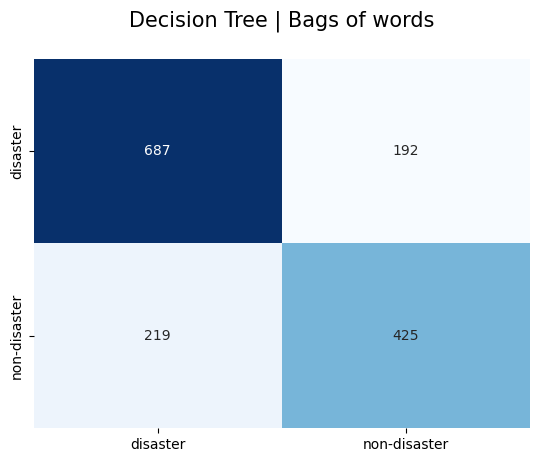

In [100]:
sns.heatmap(cm3_2, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cbar=False)
plt.title('Decision Tree | Bags of words\n', fontsize=15);

## comparison

In [101]:
model = ['random forest', 'SVM', 'Decision Tree']
data = [[acs1_1,acs1_2],[acs2_1,acs2_2],[acs3_1,acs3_2]]

In [102]:
acs_all = pd.DataFrame(data,model, columns=['bag of word','tf-idf'])

In [103]:
acs_all

,bag of word,tf-idf
random forest,0.781353,0.774787
SVM,0.801707,0.797111
Decision Tree,0.755089,0.730138


In [104]:
round(acs_all,2)

,bag of word,tf-idf
random forest,0.78,0.77
SVM,0.80,0.80
Decision Tree,0.76,0.73


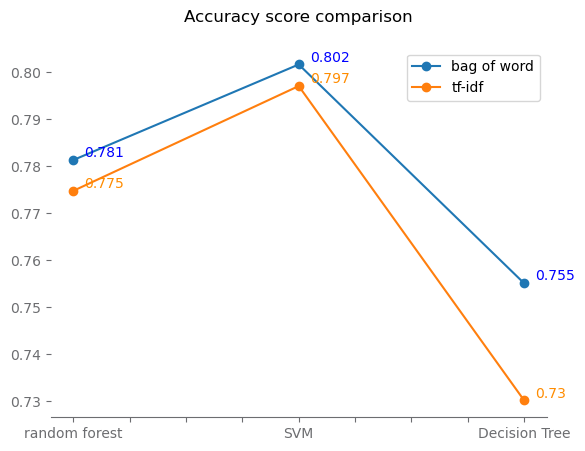

In [105]:
acs_all.plot(marker='o')
plt.title('Accuracy score comparison\n')
ax = plt.gca()
ax.spines['right'].set_color('none')  
ax.spines['left'].set_color('none')  
ax.spines['top'].set_color('none')  
ax.spines['bottom'].set_color('#6c6d70') 
plt.tick_params(axis='both', colors='#6c6d70')

for x, y in zip([0,1,2], acs_all['bag of word']):
    plt.text(x+.05, y, f'{round(y,3)}', ha='left', va='bottom', color='blue')
for x, y in zip([0,1,2], acs_all['tf-idf']):
    plt.text(x+.05, y, f'{round(y,3)}', ha='left', va='bottom', color='darkorange')


We can see that overall, tf-idf vectoriger give better result than bag of words method. The best model is SVM tf-idf vectorizaer

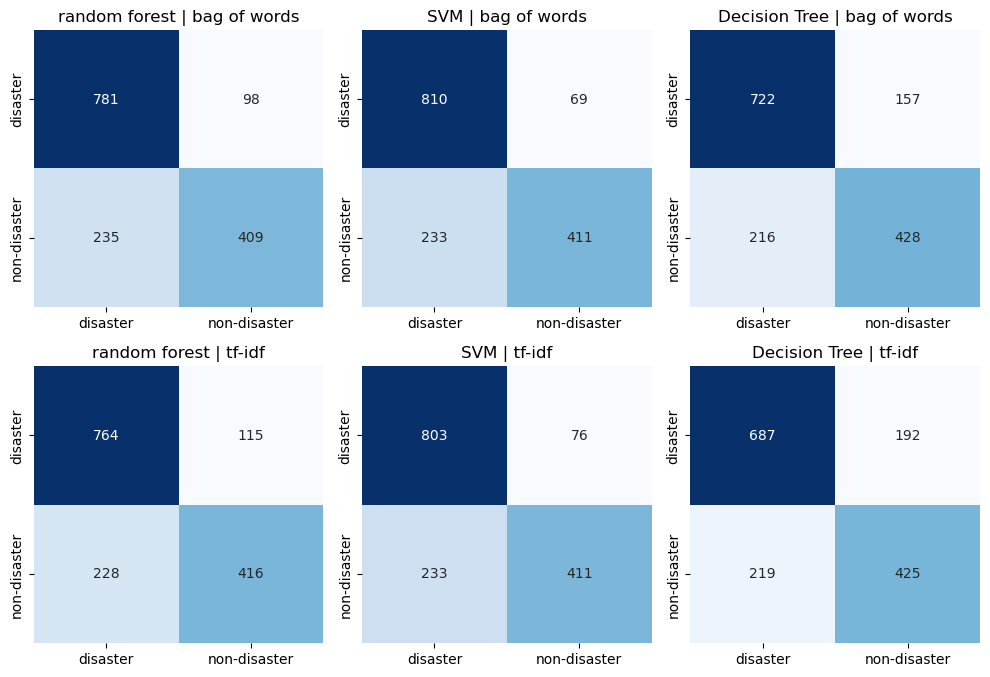

In [106]:
cm = [cm1_1,cm2_1,cm3_1,cm1_2,cm2_2,cm3_2]
plt.figure(figsize=(10,10))
for i,j in enumerate(cm):
    model = ['random forest', 'SVM', 'Decision Tree', 'random forest', 'SVM', 'Decision Tree']
    vect = ['bag of words', 'bag of words','bag of words', 'tf-idf','tf-idf','tf-idf']
    plt.subplot(3,3,i+1)
    plt.title(f'{model[i]} | {vect[i]}')
    sns.heatmap(j, cmap='Blues', annot=True, fmt='d', xticklabels=labels, yticklabels=labels,cbar=False)

plt.tight_layout()

## for example purpose

In [107]:
X[:3]

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident ask shelter place notify officer evacuation shelter place order expect']

In [108]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
count_vectorizer1 = CountVectorizer()
tfidf1 = TfidfVectorizer()

In [109]:
test = count_vectorizer1.fit_transform(X[:3])
test2 = tfidf1.fit_transform(X[:2])

In [110]:
count_vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zumiez', 'zurich', 'zzzz'], dtype=object)

In [111]:
test.toarray()

array([[1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2]],
      dtype=int64)

In [112]:
bow_exp = pd.DataFrame(test.toarray(),columns=count_vectorizer1.get_feature_names_out())
print(count_vectorizer1.get_feature_names_out())
bow_exp

['allah' 'ask' 'canada' 'deed' 'earthquake' 'evacuation' 'expect' 'fire'
 'forest' 'forgive' 'la' 'may' 'near' 'notify' 'officer' 'order' 'place'
 'reason' 'resident' 'ronge' 'sask' 'shelter']


,allah,ask,canada,deed,earthquake,evacuation,expect,fire,forest,forgive,...,near,notify,officer,order,place,reason,resident,ronge,sask,shelter
0,1,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,1,0
2,0,1,0,0,0,1,1,0,0,0,...,0,1,1,1,2,0,1,0,0,2


In [113]:
X[:2]

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada']

In [114]:
tidf_exp = pd.DataFrame(test2.toarray(),columns=tfidf1.get_feature_names_out())
print(tfidf1.get_feature_names_out())
tidf_exp

['allah' 'canada' 'deed' 'earthquake' 'fire' 'forest' 'forgive' 'la' 'may'
 'near' 'reason' 'ronge' 'sask']


,allah,canada,deed,earthquake,fire,forest,forgive,la,may,near,reason,ronge,sask
0,0.408248,0.000000,0.408248,0.408248,0.000000,0.000000,0.408248,0.000000,0.408248,0.000000,0.408248,0.000000,0.000000
1,0.000000,0.377964,0.000000,0.000000,0.377964,0.377964,0.000000,0.377964,0.000000,0.377964,0.000000,0.377964,0.377964


## demonstration the model

In [115]:
trytext1 = ['deed reason earthquake may allah forgive flood fire']

In [116]:
trytext2 = ['oh god, my hands hurt so much like a fire']

In [117]:
boq_try = tfidf.transform(trytext1)

In [123]:
boq_try2 = tfidf.transform(trytext2)

In [126]:
boq_try3 = count_vectorizer.transform(trytext2)

In [119]:
print(f'this tweet classified as : {model2_2.predict(boq_try)}')

this tweet classified as : [1]


In [120]:
print(f'this tweet classified as : {model2_2.predict(boq_try2)}')

this tweet classified as : [0]


In [127]:
print(f'this tweet classified as : {model2_2.predict(boq_try3)}')

this tweet classified as : [0]


In [132]:
tfidf

TfidfVectorizer()

## export model to deploy

model

In [128]:
model2_1

SVC(random_state=2023)

In [122]:
import joblib

In [129]:
joblib.dump(model2_1, 'trained_model.joblib')

['trained_model.joblib']

vectorizer

In [131]:
# Save the fitted CountVectorizer
joblib.dump(count_vectorizer, 'count_vectorizer.pkl')

['count_vectorizer.pkl']